## Классификация новостей [AG's News Topic Classification Dataset](https://github.com/mhjabreel/CharCnn_Keras/tree/master/data/ag_news_csv)

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

Используется три архитектуры нейронных сетей:
- Одномерная сверточная нейросеть
- Рекуррентная нейросеть LSTM
- Рекуррентная нейросеть GRU

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Не забудьте подключить GPU, чтобы сеть обучалась быстрее (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

In [1]:
%config InlineBackend.figure_format ='retina'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, SimpleRNN, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина новости
max_news_len = 30
# Количество классов новостей
nb_classes = 4

## Loading dataset file

## Загружаем данные в память

Читаем данные из файла

In [3]:
train = pd.read_csv('train.csv', 
                    header=None, 
                    names=['class', 'title', 'text'])

In [4]:
train

,class,title,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


Выделяем данные для обучения

In [5]:
news = train['text']

In [6]:
news[:5]

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: text, dtype: object

Выделяем правильные ответы

In [7]:
y_train = utils.to_categorical(train['class'] - 1, nb_classes)

In [8]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

## Токенизация текста

In [9]:
news[:5]

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: text, dtype: object

Создаем токенизатор Keras

In [10]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на новостях

In [11]:
tokenizer.fit_on_texts(news)

Просматриваем словарь токенизатора

In [12]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'its': 14,
 'at': 15,
 'said': 16,
 'is': 17,
 'by': 18,
 'it': 19,
 'has': 20,
 'new': 21,
 'an': 22,
 'from': 23,
 'reuters': 24,
 'his': 25,
 'will': 26,
 'was': 27,
 'after': 28,
 'have': 29,
 'be': 30,
 'their': 31,
 'two': 32,
 'are': 33,
 'us': 34,
 'over': 35,
 'quot': 36,
 'year': 37,
 'first': 38,
 'ap': 39,
 'he': 40,
 'but': 41,
 'gt': 42,
 'lt': 43,
 'this': 44,
 'more': 45,
 'monday': 46,
 'wednesday': 47,
 'one': 48,
 'tuesday': 49,
 'up': 50,
 'thursday': 51,
 'company': 52,
 'inc': 53,
 'friday': 54,
 'world': 55,
 'than': 56,
 'u': 57,
 '1': 58,
 'last': 59,
 'they': 60,
 'york': 61,
 'yesterday': 62,
 'against': 63,
 'about': 64,
 'who': 65,
 'not': 66,
 'were': 67,
 'into': 68,
 'out': 69,
 'three': 70,
 'been': 71,
 'president': 72,
 '2': 73,
 'had': 74,
 'million': 75,
 'corp': 76,
 'oil': 77,
 'when': 78,
 'week': 79,
 'time'

Преобразуем новости в числовое представление

In [13]:
sequences = tokenizer.texts_to_sequences(news)

Просматриваем новости в числовом представлении

In [14]:
index = 1
print(news[index])
print(sequences[index])

Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
[24, 863, 751, 371, 93, 84, 20, 2, 3916, 8, 453, 431, 6, 1308, 2799, 5, 1, 549, 237, 20, 3528, 2002, 14, 8267, 7, 216, 314, 4, 1, 131]


In [15]:
tokenizer.word_index['group']

93

Ограничиваем длину отзывов

In [16]:
x_train = pad_sequences(sequences, maxlen=max_news_len)

In [17]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   24,  758, 7851,  433,
        5786, 2861,    4, 5916,   33, 3642,  831,  432],
       [  24,  863,  751,  371,   93,   84,   20,    2, 3916,    8,  453,
         431,    6, 1308, 2799,    5,    1,  549,  237,   20, 3528, 2002,
          14, 8267,    7,  216,  314,    4,    1,  131],
       [  24, 2199,  463,  105, 1568, 1484,   64,    1,  397,    6,    1,
        1026,    8,  317,   33,  178,    3, 6377,   35,    1,  311,  131,
          99,   79,  189,    1, 6120,    4,    1, 1068],
       [   0,   24,  713,   29, 5142,   77, 3549, 7993,   23,    1,  737,
        3199,    5,  493,  106,   28, 1402,  573,    2,  825, 2601,   90,
         760, 2559,   22,   77,  292,   16,    7,   97],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  165,
          55,   77,  105, 8851, 1776,    6, 8268, 3454,    2,   21,  343,
        3036,   70,  266,  151, 

## RNN

In [18]:
model_rnn = Sequential()
model_rnn.add(Embedding(num_words, 32, input_length=max_news_len))
model_rnn.add(SimpleRNN(16))
model_rnn.add(Dense(4, activation='softmax'))

In [19]:
model_rnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [20]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 32)            320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 4)                 68        
Total params: 320,852
Trainable params: 320,852
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [21]:
history_rnn = model_rnn.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1)
#,callbacks=[checkpoint_callback_cnn])

Train on 108000 samples, validate on 12000 samples
Epoch 1/5
108000/108000 [==============================] - 16s 149us/sample - loss: 0.5676 - accuracy: 0.8011 - val_loss: 0.3534 - val_accuracy: 0.8840
Epoch 2/5
108000/108000 [==============================] - 19s 173us/sample - loss: 0.2986 - accuracy: 0.9049 - val_loss: 0.3500 - val_accuracy: 0.8827
Epoch 3/5
108000/108000 [==============================] - 20s 188us/sample - loss: 0.2491 - accuracy: 0.9192 - val_loss: 0.3566 - val_accuracy: 0.8765
Epoch 4/5
108000/108000 [==============================] - 21s 191us/sample - loss: 0.2119 - accuracy: 0.9317 - val_loss: 0.3797 - val_accuracy: 0.8733
Epoch 5/5
108000/108000 [==============================] - 19s 175us/sample - loss: 0.1737 - accuracy: 0.9440 - val_loss: 0.3982 - val_accuracy: 0.8698


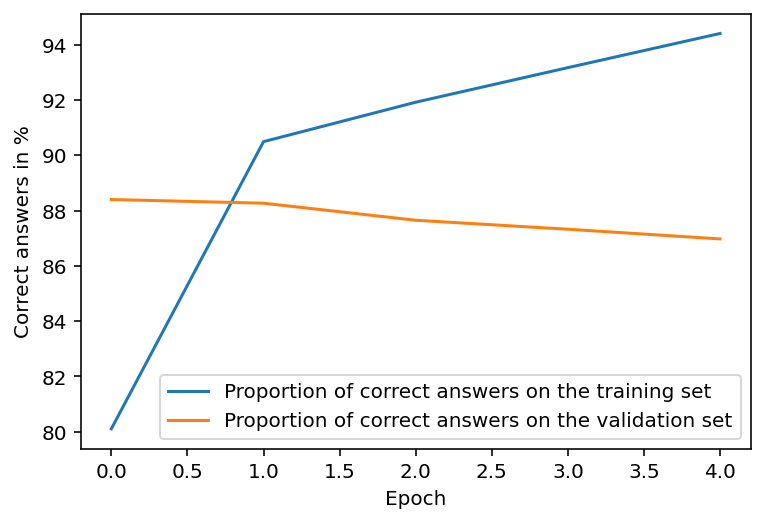

In [36]:
plt.plot(np.array(history_rnn.history['accuracy'])*100, 
         label='Proportion of correct answers on the training set')
plt.plot(np.array(history_rnn.history['val_accuracy'])*100, 
         label='Proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('Correct answers in %')
plt.legend()
plt.show()

## Cеть LSTM

In [23]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_news_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(4, activation='softmax'))

In [24]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [25]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 32)            320000    
_________________________________________________________________
lstm (LSTM)                  (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
Total params: 323,204
Trainable params: 323,204
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [26]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1)
#,                              callbacks=[checkpoint_callback_lstm])

Train on 108000 samples, validate on 12000 samples
Epoch 1/5
108000/108000 [==============================] - 11s 100us/sample - loss: 0.5313 - accuracy: 0.8088 - val_loss: 0.3386 - val_accuracy: 0.8851
Epoch 2/5
108000/108000 [==============================] - 7s 67us/sample - loss: 0.2782 - accuracy: 0.9113 - val_loss: 0.3238 - val_accuracy: 0.8855
Epoch 3/5
108000/108000 [==============================] - 7s 68us/sample - loss: 0.2411 - accuracy: 0.9227 - val_loss: 0.3292 - val_accuracy: 0.8850
Epoch 4/5
108000/108000 [==============================] - 7s 69us/sample - loss: 0.2176 - accuracy: 0.9305 - val_loss: 0.3449 - val_accuracy: 0.8817
Epoch 5/5
108000/108000 [==============================] - 8s 72us/sample - loss: 0.1971 - accuracy: 0.9360 - val_loss: 0.3534 - val_accuracy: 0.8817


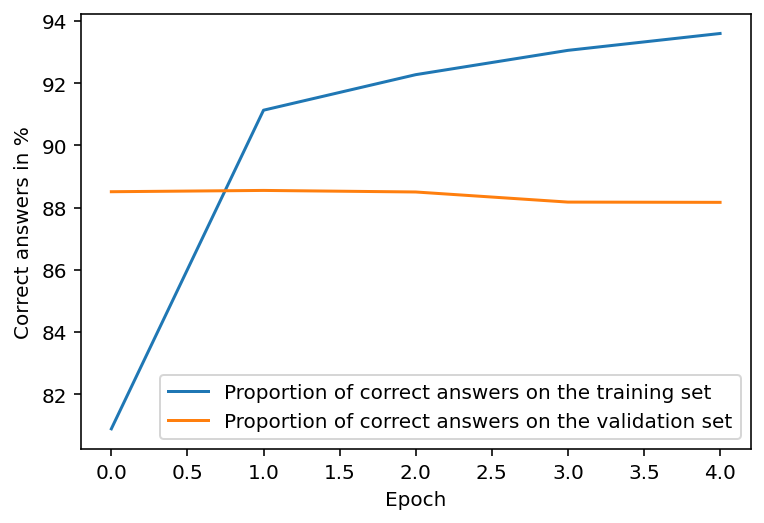

In [27]:
plt.plot(np.array(history_lstm.history['accuracy'])*100, 
         label='Proportion of correct answers on the training set')
plt.plot(np.array(history_lstm.history['val_accuracy'])*100, 
         label='Proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('Correct answers in %')
plt.legend()
plt.show()

## Cеть GRU

In [37]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_news_len))
model_gru.add(GRU(16))
model_gru.add(Dense(4, activation='softmax'))

In [38]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [39]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 32)            320000    
_________________________________________________________________
gru (GRU)                    (None, 16)                2400      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
Total params: 322,468
Trainable params: 322,468
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model_gru.h5`

In [40]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1)
#,                              callbacks=[checkpoint_callback_gru])

Train on 108000 samples, validate on 12000 samples
Epoch 1/5
108000/108000 [==============================] - 9s 85us/sample - loss: 0.5487 - accuracy: 0.7926 - val_loss: 0.3398 - val_accuracy: 0.8820
Epoch 2/5
108000/108000 [==============================] - 7s 69us/sample - loss: 0.2890 - accuracy: 0.9062 - val_loss: 0.3162 - val_accuracy: 0.8880
Epoch 3/5
108000/108000 [==============================] - 7s 69us/sample - loss: 0.2467 - accuracy: 0.9199 - val_loss: 0.3174 - val_accuracy: 0.8893
Epoch 4/5
108000/108000 [==============================] - 7s 69us/sample - loss: 0.2248 - accuracy: 0.9266 - val_loss: 0.3268 - val_accuracy: 0.8847
Epoch 5/5
108000/108000 [==============================] - 8s 70us/sample - loss: 0.2085 - accuracy: 0.9312 - val_loss: 0.3389 - val_accuracy: 0.8828


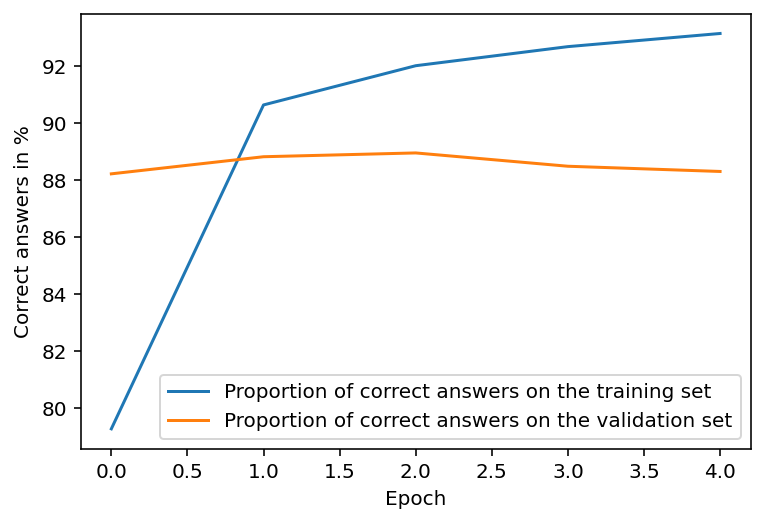

In [41]:
plt.plot(np.array(history_gru.history['accuracy'])*100, 
         label='Proportion of correct answers on the training set')
plt.plot(np.array(history_gru.history['val_accuracy'])*100, 
         label='Proportion of correct answers on the validation set')
plt.xlabel('Epoch')
plt.ylabel('Correct answers in %')
plt.legend()
plt.show()

## Загружаем набор данных для тестирования

In [42]:
test = pd.read_csv('test.csv', 
                    header=None, 
                    names=['class', 'title', 'text'])

In [43]:
test

,class,title,text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


Преобразуем новости в числовое представление

Обратите внимание, что нужно использовать токенизатор, обученный на наборе данных train.

In [44]:
test_sequences = tokenizer.texts_to_sequences(test['text'])

In [45]:
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

In [46]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 2020, 3371,  449,   15, 6956,  252,   60,   33,
          28,  289,   12, 9088, 2184,  371,  169, 9284],
       [  92,  119,    4, 3472,    8,    1,  402,  134,   75, 5471, 1516,
        1227,    2, 3436,    8, 2744, 5220,  230,  936,   20, 2148,  117,
           1,   38,  561, 1974,    8,   14, 3957, 1218],
       [   2,   52, 5787,   18,    2, 4914,   15,    1,  525,    4, 4586,
         227,    2, 3922,    3, 1316,    2, 6888,    4, 2893,  576,   84,
          33,  758, 6515,    4,    1, 1013, 5154,    4],
       [9642, 1291,    6, 8714,   41,  671,   40, 2977,  177,    1,  108,
          26, 1027, 7300,   26,  760,    5, 3356,   40, 1271, 2450,   26,
        2170,   50, 3356,   26, 7415,    6, 9153,   26],
       [   0,    0,    0,    0,    0,    0,   39,  493, 7343,  832,  400,
         820,   28, 3827,    4,    1, 4474,   54, 9411,    1, 1273,   38,
        1230,    3, 1365,  348, 

Правильные ответы

In [47]:
y_test = utils.to_categorical(test['class'] - 1, nb_classes)

In [48]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

## Оцениваем качество работы сети на тестовом наборе данных

### Одномерная сверточная сеть 

In [52]:
res_rnn = model_rnn.evaluate(x_test, y_test, verbose=1)

7600/7600 [==============================] - 1s 179us/sample - loss: 0.3866 - accuracy: 0.8789


### Сеть LSTM

In [55]:
res_lstm = model_lstm.evaluate(x_test, y_test, verbose=1)

7600/7600 [==============================] - 1s 132us/sample - loss: 0.3476 - accuracy: 0.8871


### Сеть GRU

In [56]:
res_gru = model_gru.evaluate(x_test, y_test, verbose=1)

7600/7600 [==============================] - 1s 107us/sample - loss: 0.3370 - accuracy: 0.8891


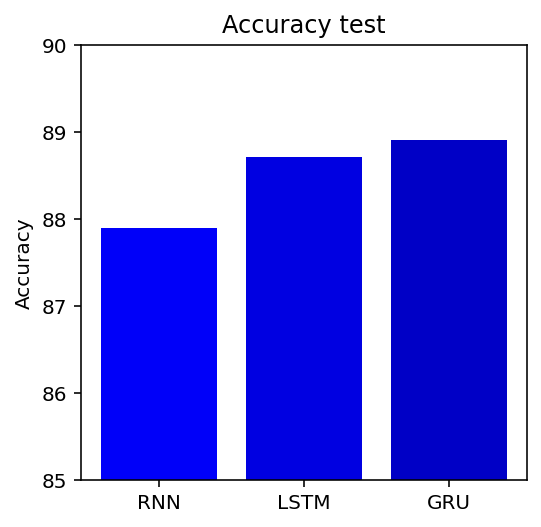

In [98]:
acc = np.append(np.append(res_rnn[1], res_lstm[1]), res_gru[1])
fig, ax = plt.subplots()

ax.bar(['RNN','LSTM','GRU'], acc*100, color=['#0000f9', '#0000e1','#0000c6'])
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy test')
fig.set_figwidth(4)    #  ширина Figure
plt.axis(ymin=85,ymax=90)
plt.show()